Loading module. All the calculations need to be performed calling the functions through the module (*Analytical.functionName*)

In [3]:
using Analytical
using PyPlot
using BenchmarkTools

function asympPlot(alphaValues,originalAsymp)
    fig    = plt.figure(figsize=(8, 6))
    plt.style.use("seaborn")

    x      = 1:size(alphaValues)[1]
    y1     = alphaValues[:,1]
    y2     = alphaValues[:,2]

    plt.plot(x, y1,"-",color="#91d5db")
    plt.plot(x, y1,"o",color="#91d5db")
    plt.plot(x, y2,"-",color="#fab4be")
    plt.plot(x, y2,"o",color="#fab4be")
    plt.plot(x, fill(originalAsymp,size(alphaValues)[1]),"-.",color="gray")
    plt.grid()
    plt.xscale("log")
    plt.xlim(0,60)
    # plt.ylim((y1.min() - (y1.min()*50/100)),0.25)
    plt.xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
    plt.grid()
end
function bgsPlot(bgs1,bgs2,bgs3,bgs4,trueAlpha)
    fig    = plt.figure(figsize=(8, 6))
    plt.style.use("seaborn")

    x      = 1:length(bgs1)
    y1     = bgs1
    y2     = bgs2
    y3     = bgs3
    y4     = bgs4

    plt.plot(x, y1,"-",color="blue")
    plt.plot(x, y2,"-",color="orange")
    plt.plot(x, y3,"-",color="yellow")
    plt.plot(x, y4,"-",color="red")
    plt.plot(x, fill(trueAlpha,length(bgs1)),"-.",color="gray")
    plt.grid()
    plt.xscale("log")
    plt.xticks([1,2,5,10,20,50],[1,2,5,10,20,50])
    plt.grid()

    plt.xlim(0,60)
end

bgsPlot (generic function with 1 method)

The variable *adap* contains all parameters needed to estimate $\alpha_{x}$ under $N$ conditions. You can change *adap* default values to another ones using the functions *Analytical.changeParameters*. If you do not declare options it will use the default values. 

In [4]:
adap

Analytical.parameters
  gam_neg: Int64 -83
  gL: Int64 10
  gH: Int64 500
  alLow: Float64 0.2
  alTot: Float64 0.2
  theta_f: Float64 0.001
  theta_mid_neutral: Float64 0.001
  al: Float64 0.184
  be: Float64 0.000402
  B: Float64 0.999
  pposL: Float64 0.001
  pposH: Float64 0.0
  N: Int64 500
  n: Int64 250
  Lf: Int64 1000000
  L_mid: Int64 501
  rho: Float64 0.001
  al2: Float64 0.0415
  be2: Float64 0.00515625
  TE: Float64 5.0
  ABC: Bool false
  NN: Int64 1000
  nn: Int64 500
  bn: Array{Float64}((500,)) [0.0, 4.64466e-310, 4.64466e-310, 4.64466e-310, 4.64466e-310, 4.64466e-310, 6.90981e-310, 4.64466e-310, 4.64466e-310, 4.24399e-314  …  0.0, 0.0, 4.64466e-310, 1.0326e-321, 4.64466e-310, 6.90981e-310, 4.64466e-310, 4.64466e-310, 4.64466e-310, 4.64466e-310]


### Solving original approximation. Using default parameters provided at *al_x.py*: no bgs and 20% of alpha due to weak selection

Parameters need to be defined before any calculation. When *changeParameteres* is executed the binomial frequency distribution is estimated for the given sample size ($n$), population size ($N_{e}$) and background selection ($B$) values. If $B$, $N$ or $n$ are changed the binomial will need to be executed again. I added an argument in order to estimate or not the binomial depending in the changes introduced ($binomial = bool$).

In [5]:
@time Analytical.changeParameters(gam_neg=-83,gL=10,gH=500,alLow=0.2,alTot=0.2,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=0.999,pposL=0.001,pposH=0,N=500,n=250,Lf=10^6,L_mid=501,rho=0.001,al2= 0.0415,be2=0.00515625,TE=5.0,ABC=false,binomial=true)

  0.627725 seconds (1.84 M allocations: 103.718 MiB, 7.95% gc time)


501×1000 Array{Float64,2}:
 1.0  0.606075     0.367143     0.222293     …  0.0          0.0          0.0
 0.0  0.303645     0.368248     0.334778        0.0          0.0          0.0
 0.0  0.0759112    0.184308     0.251588        0.0          0.0          0.0
 0.0  0.0126265    0.0613745    0.125794        0.0          0.0          0.0
 0.0  0.00157199   0.0152975    0.047078        0.0          0.0          0.0
 0.0  0.000156254  0.00304415   0.0140667    …  0.0          0.0          0.0
 0.0  1.29168e-5   0.000503796  0.00349548      0.0          0.0          0.0
 0.0  9.13382e-7   7.13212e-5   0.000743016     0.0          0.0          0.0
 0.0  5.63999e-8   8.81678e-6   0.000137917     0.0          0.0          0.0
 0.0  3.08938e-9   9.66869e-7   2.27092e-5      0.0          0.0          0.0
 0.0  1.51992e-10  9.52322e-8   3.3585e-6    …  0.0          0.0          0.0
 0.0  6.78414e-12  8.50986e-9   4.5062e-7       0.0          0.0          0.0
 0.0  2.77008e-13  6.9564e-10   5.530

In [6]:
function analyticalTime()
    Analytical.set_theta_f()
    theta_f = adap.theta_f
    adap.B = 0.999
    Analytical.set_theta_f()
    Analytical.setPpos()
    adap.theta_f = theta_f
    adap.B = 0.999

    pos, nopos = Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,"both")
    return(pos,nopos)
end

analyticalTime (generic function with 1 method)

In [7]:
@btime analyticalTime()

  5.166 ms (90695 allocations: 1.57 MiB)


([-0.450096, -0.345256, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224547, 0.0209377, 0.0193944, 0.0178243, 0.0162273, 0.0146029, 0.0129516, 0.0112747, 0.00957762, 0.0078863], [-0.434604, -0.329051, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

Take into account the original values the analysis is performed in 5.3ms when the binomial sampling is already executed. The binomial sampling only need to be execute once per $B$ value, since we are going to execute the summary statistics with fixed population and sampling size. I present bellow the time execution when the binomial is estimated within the analysis.

In [8]:
function analyticalTime(;bgs,al,alweak,gam,popsize,sample,lCoding,lNonCoding,gamWeak,gamStrong,binomial)
    
    Analytical.changeParameters(B=bgs,gam_neg=gam,theta_f=0.001,alLow=alweak,alTot=al,L_mid=lCoding,Lf=lNonCoding,N=popsize,gL=10,n=sample,gH=500,binomial=binomial)
    
    Analytical.set_theta_f()
    theta_f = adap.theta_f
    adap.B = 0.999
    Analytical.set_theta_f()
    Analytical.setPpos()
    adap.theta_f = theta_f
    adap.B = 0.999

    pos, nopos = Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,"both")
    return(pos,nopos)
end

analyticalTime (generic function with 1 method)

In [9]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-83,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=true)

  74.671 ms (92766 allocations: 9.30 MiB)


([-0.450096, -0.345256, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224547, 0.0209377, 0.0193944, 0.0178243, 0.0162273, 0.0146029, 0.0129516, 0.0112747, 0.00957762, 0.0078863], [-0.434604, -0.329051, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

#### Changing gamma values

Here we don't need to estimate the binomial because $N_{e}$, $n$ and $B$ are exactly the same as before

In [10]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=false)

  5.390 ms (90738 allocations: 1.57 MiB)


([-0.450096, -0.345257, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224547, 0.0209377, 0.0193944, 0.0178243, 0.0162272, 0.0146029, 0.0129516, 0.0112746, 0.0095776, 0.00788628], [-0.434604, -0.329051, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

In [11]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=false)
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-83,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=20,gamStrong=500,binomial=false)
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-83,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=400,binomial=false)
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=40,gamStrong=600,binomial=false)

  5.149 ms (90738 allocations: 1.57 MiB)
  3.516 ms (90738 allocations: 1.57 MiB)
  5.268 ms (90738 allocations: 1.57 MiB)
  6.089 ms (90738 allocations: 1.57 MiB)


([-0.450096, -0.345257, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224547, 0.0209377, 0.0193944, 0.0178243, 0.0162272, 0.0146029, 0.0129516, 0.0112746, 0.0095776, 0.00788628], [-0.434604, -0.329051, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

#### Reducing Ne in a half

In [12]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=250,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=true)

  32.855 ms (68536 allocations: 5.04 MiB)


([-0.409011, -0.337543, -0.278013, -0.235809, -0.205472, -0.182283, -0.163643, -0.148136, -0.134911, -0.123417  …  0.0209446, 0.019416, 0.0178618, 0.0162821, 0.0146771, 0.013048, 0.0113976, 0.00973411, 0.00808526, 0.00653362], [-0.39318, -0.321148, -0.261084, -0.218434, -0.187722, -0.164202, -0.145266, -0.129486, -0.116007, -0.104275  …  0.201206, 0.201326, 0.201445, 0.201564, 0.201683, 0.201802, 0.201919, 0.202035, 0.202148, 0.202253])

#### Reducing n in a half

In [13]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=125,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=true) 

  35.149 ms (86016 allocations: 5.34 MiB)


([-0.382374, -0.262983, -0.199288, -0.160156, -0.132654, -0.111703, -0.0949131, -0.0809844, -0.0691346, -0.0588587  …  0.0398371, 0.0373813, 0.0348427, 0.0322179, 0.0295037, 0.0266965, 0.0237931, 0.0207903, 0.0176869, 0.0144921], [-0.366426, -0.246035, -0.18161, -0.141898, -0.113899, -0.0925054, -0.075312, -0.0610085, -0.0488064, -0.0381962  …  0.199497, 0.199743, 0.199989, 0.200233, 0.200476, 0.200718, 0.200959, 0.201198, 0.201437, 0.201673])

#### Duplicating Ne and n values

In [14]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-83,popsize=1000,sample=500,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=true)

  265.491 ms (163657 allocations: 33.50 MiB)


([-0.549129, -0.437329, -0.3658, -0.319463, -0.286373, -0.260923, -0.240383, -0.223246, -0.208597, -0.195841  …  0.012985, 0.012142, 0.0112915, 0.0104337, 0.00956857, 0.00869617, 0.00781685, 0.00693154, 0.00604329, 0.00516539], [-0.534198, -0.421821, -0.349848, -0.303167, -0.26979, -0.244091, -0.22333, -0.205991, -0.191156, -0.178225  …  0.20178, 0.201839, 0.201899, 0.201958, 0.202017, 0.202076, 0.202135, 0.202194, 0.202252, 0.20231])

In [15]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-83,popsize=1000,sample=500,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=false)

  13.097 ms (157628 allocations: 2.77 MiB)


([-0.549129, -0.437329, -0.3658, -0.319463, -0.286373, -0.260923, -0.240383, -0.223246, -0.208597, -0.195841  …  0.012985, 0.012142, 0.0112915, 0.0104337, 0.00956857, 0.00869617, 0.00781685, 0.00693154, 0.00604329, 0.00516539], [-0.534198, -0.421821, -0.349848, -0.303167, -0.26979, -0.244091, -0.22333, -0.205991, -0.191156, -0.178225  …  0.20178, 0.201839, 0.201899, 0.201958, 0.202017, 0.202076, 0.202135, 0.202194, 0.202252, 0.20231])

#### Reducing length in a half

When the expected values are solved for different gamma distributions for the same $N_{e}$, $n$ and $B$ it easier to defined first the binomial and then execute the analysis.

In [16]:
analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=501,lNonCoding=10^6,gamWeak=10,gamStrong=500,binomial=true)

([-0.450096, -0.345257, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224547, 0.0209377, 0.0193944, 0.0178243, 0.0162272, 0.0146029, 0.0129516, 0.0112746, 0.0095776, 0.00788628], [-0.434604, -0.329051, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

In [17]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=501,lNonCoding=5*10^5,gamWeak=10,gamStrong=500,binomial=false)

  6.139 ms (90634 allocations: 1.57 MiB)


([-0.450097, -0.345257, -0.278563, -0.235798, -0.205495, -0.182307, -0.163661, -0.148149, -0.134919, -0.123421  …  0.0224545, 0.0209375, 0.0193942, 0.0178241, 0.016227, 0.0146027, 0.0129514, 0.0112745, 0.00957741, 0.00788609], [-0.434604, -0.329052, -0.261798, -0.218591, -0.187915, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201671, 0.20179, 0.201908, 0.202025, 0.20214])

#### Duplicating length values

In [18]:
@btime analyticalTime(bgs=0.999,al=0.2,alweak=0.2,gam=-200,popsize=500,sample=250,lCoding=1002,lNonCoding=2*10^6,gamWeak=10,gamStrong=500,binomial=false)

  6.334 ms (90741 allocations: 1.57 MiB)


([-0.450096, -0.345256, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148148, -0.134919, -0.123421  …  0.0224548, 0.0209378, 0.0193945, 0.0178245, 0.0162274, 0.0146031, 0.0129517, 0.0112748, 0.00957774, 0.00788642], [-0.434604, -0.329051, -0.261798, -0.21859, -0.187914, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201672, 0.20179, 0.201908, 0.202026, 0.20214])

### Exploring computation times on one-by-one

In [19]:
@btime Analytical.set_theta_f()
theta_f = adap.theta_f
adap.B = 0.999
@btime Analytical.set_theta_f()
@btime Analytical.setPpos()
adap.theta_f = theta_f
adap.B = 0.999
@btime pos, nopos = Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,"both")

  7.655 μs (288 allocations: 5.64 KiB)
  8.091 μs (288 allocations: 5.64 KiB)
  1.132 ms (51371 allocations: 823.14 KiB)
  2.849 ms (38740 allocations: 777.36 KiB)


([-0.450096, -0.345256, -0.278563, -0.235798, -0.205494, -0.182307, -0.163661, -0.148148, -0.134919, -0.123421  …  0.0224548, 0.0209378, 0.0193945, 0.0178245, 0.0162274, 0.0146031, 0.0129517, 0.0112748, 0.00957774, 0.00788642], [-0.434604, -0.329051, -0.261798, -0.21859, -0.187914, -0.164401, -0.145461, -0.129678, -0.116197, -0.104463  …  0.201073, 0.201193, 0.201313, 0.201433, 0.201552, 0.201672, 0.20179, 0.201908, 0.202026, 0.20214])

Currently *setPpos()* is one of the slowest function. It is still performed using *scipy.optimize.fsolve*. I tried several methods to find the roots and the default is the faster. In addition I implemented a julia version to solve the equation system using *NLsolve.jl* which is slower than *scipy* too.

In [20]:
# Fixation
@btime fN    = adap.B*Analytical.fixNeut()
@btime fNeg  = adap.B*Analytical.fixNegB(0.5*adap.pposH+0.5*adap.pposL)
@btime fPosL = Analytical.fixPosSim(adap.gL,0.5*adap.pposL)
@btime fPosH = Analytical.fixPosSim(adap.gH,0.5*adap.pposH)

# Polymorphism
@btime neut = Analytical.cumulativeSfs(Analytical.DiscSFSNeutDown())
@btime selH = Analytical.cumulativeSfs(Analytical.DiscSFSSelPosDown(adap.gH,adap.pposH))
@btime selL = Analytical.cumulativeSfs(Analytical.DiscSFSSelPosDown(adap.gL,adap.pposL))
@btime selN = Analytical.cumulativeSfs(Analytical.DiscSFSSelNegDown(adap.pposH+adap.pposL))

  156.248 ns (7 allocations: 112 bytes)
  1.244 μs (40 allocations: 640 bytes)
  882.250 ns (43 allocations: 688 bytes)
  15.780 μs (1046 allocations: 16.34 KiB)
  78.312 μs (22 allocations: 32.44 KiB)
  1.821 μs (5 allocations: 12.23 KiB)
  388.879 μs (5552 allocations: 150.39 KiB)
  881.345 μs (18536 allocations: 329.73 KiB)


500-element Array{Float64,1}:
 0.0020192075325289154
 0.0016506235979820293
 0.001434335298737289 
 0.0012979682467078957
 0.0012014814347295455
 0.0011276633743932598
 0.0010683029032469678
 0.0010189094099095238
 0.0009767725629925175
 0.0009401376126760302
 0.0009078068772816744
 0.0008789284394524372
 0.0008528758812960313
 ⋮                    
 3.815844361748628e-6 
 3.464238562166509e-6 
 3.1134560762034186e-6
 2.7634933056756003e-6
 2.41434667536205e-6  
 2.066012632200055e-6 
 1.7184876550853603e-6
 1.371768375083796e-6 
 1.0258501736459469e-6
 6.807034273707759e-7 
 3.364669597066985e-7 
 0.0                  

We we're able to reduce *DiscSFSSelNegDown()* from $1.13s$ to $1.106ms$

### Replicating results

Defining and plotting analytical results with paper's values

In [21]:
Analytical.changeParameters(gam_neg=-83,gL=10,gH=500,alLow=0.2,alTot=0.2,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=0.999,pposL=0.001,pposH=0,N=500,n=25,Lf=10^6,L_mid=501,rho=0.001,al2= 0.0415,be2=0.00515625,TE=5.0,ABC=false,binomial=true)

51×1000 Array{Float64,2}:
 1.0  0.951158      0.904656      …  1.18366e-135  1.0513e-150   0.0
 0.0  0.0476532     0.0907378        2.95026e-131  5.24597e-146  0.0
 0.0  0.00116984    0.00445953       3.60323e-127  1.28269e-141  0.0
 0.0  1.8755e-5     0.000143134      2.87393e-123  2.0482e-137   0.0
 0.0  2.20813e-7    3.37378e-6       1.68337e-119  2.40183e-133  0.0
 0.0  2.03555e-9    6.22643e-8    …  7.72028e-116  2.20526e-129  0.0
 0.0  1.52972e-11   9.36776e-10      2.88642e-112  1.65064e-125  0.0
 0.0  9.63466e-14   1.1812e-11       9.04439e-109  1.03547e-121  0.0
 0.0  5.18901e-16   1.27362e-13      2.42339e-105  5.55451e-118  0.0
 0.0  2.42639e-18   1.19228e-15      5.63761e-102  2.58692e-114  0.0
 0.0  9.96814e-21   9.80615e-18   …  1.15224e-98   1.05852e-110  0.0
 0.0  3.63204e-23   7.15321e-20      2.0887e-95    3.84145e-107  0.0
 0.0  1.18278e-25   4.66358e-22      3.38396e-92   1.24598e-103  0.0
 ⋮                                ⋱                                 
 0.0  3.

In [22]:
Analytical.set_theta_f()
theta_f = adap.theta_f
adap.B = 0.999
Analytical.set_theta_f()
Analytical.setPpos()
adap.theta_f = theta_f
adap.B = 0.999

pos, nopos = Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,"both")

([-0.22122, -0.0986517, -0.0462206, -0.0153059, 0.00602722, 0.0220378, 0.0346916, 0.0450466, 0.0537335, 0.0611561  …  0.101811, 0.0990218, 0.0957664, 0.0919827, 0.0875967, 0.0825198, 0.0766458, 0.0698466, 0.0619684, 0.0528265], [-0.203873, -0.079338, -0.0254348, 0.00674253, 0.0292286, 0.0463284, 0.0600328, 0.071416, 0.0811194, 0.089555  …  0.185441, 0.186967, 0.188452, 0.189898, 0.191306, 0.19268, 0.194019, 0.195326, 0.196603, 0.19785])

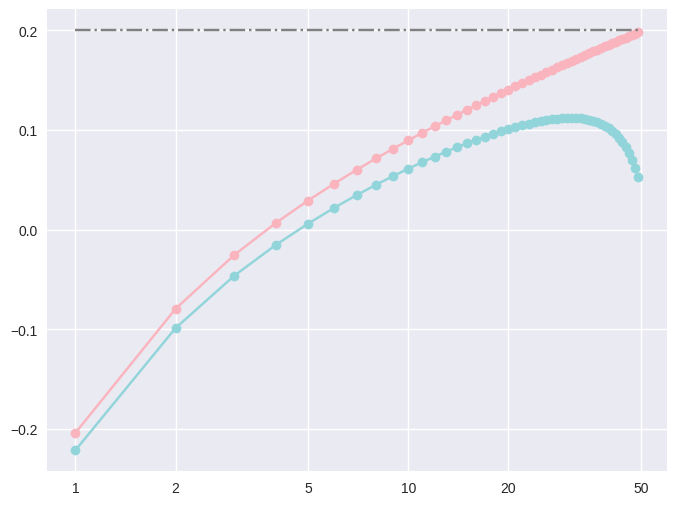

In [23]:
asympPlot(hcat(pos,nopos),0.2)

In [24]:
B  = [0.4,0.6,0.8,0.999]
al = float(0.2)

###########################

function bgs(alphaLow)
    results = Array{Array}(undef,length(B))
    for i in 1:length(B)

        println(B[i])
        Analytical.changeParameters(gam_neg=-83,gL=10,gH=500,alLow=alphaLow,alTot=0.2,theta_f=1e-3,theta_mid_neutral=1e-3,al=0.184,be=0.000402,B=B[i],pposL=0.001,pposH=0,N=500,n=25,Lf=10^6,L_mid=501,rho=0.001,al2= 0.0415,be2=0.00515625,TE=5.0,ABC=false)

        # here the software calculates the mutation rates corresponding to the desired terms
        Analytical.set_theta_f()
        theta_f = adap.theta_f
        adap.B = 0.999
        Analytical.set_theta_f()
        Analytical.setPpos()
        adap.theta_f = theta_f
        adap.B = B[i]
        # run the calucation

        x = Analytical.alphaByFrequencies(adap.gL,adap.gH,adap.pposL,adap.pposH,"nopos")
        results[i] = x
    end
    return results
end

bgs (generic function with 1 method)

In [25]:
strong = bgs(0.0)
weak = bgs(0.2)

0.4
0.6
0.8
0.999
0.4
0.6
0.8
0.999


4-element Array{Array,1}:
 [-0.350972, -0.224769, -0.164394, -0.128032, -0.10258, -0.0832095, -0.0676774, -0.0547719, -0.0437682, -0.0342004  …  0.0746289, 0.0763615, 0.0780474, 0.0796889, 0.0812881, 0.0828472, 0.084368, 0.0858522, 0.0873012, 0.0887152]
 [-0.300535, -0.172347, -0.114123, -0.0792374, -0.0548411, -0.0362822, -0.021405, -0.00904597, 0.0014904, 0.0106509  …  0.114808, 0.116466, 0.11808, 0.11965, 0.121181, 0.122672, 0.124128, 0.125548, 0.126935, 0.128289]          
 [-0.250852, -0.123871, -0.0678574, -0.0343759, -0.010972, 0.00682805, 0.0210949, 0.0329459, 0.0430484, 0.0518314  …  0.151676, 0.153266, 0.154812, 0.156317, 0.157784, 0.159214, 0.160609, 0.16197, 0.1633, 0.164598]             
 [-0.203873, -0.079338, -0.0254348, 0.00674253, 0.0292286, 0.0463284, 0.0600328, 0.071416, 0.0811194, 0.089555  …  0.185441, 0.186967, 0.188452, 0.189898, 0.191306, 0.19268, 0.194019, 0.195326, 0.196603, 0.19785]               

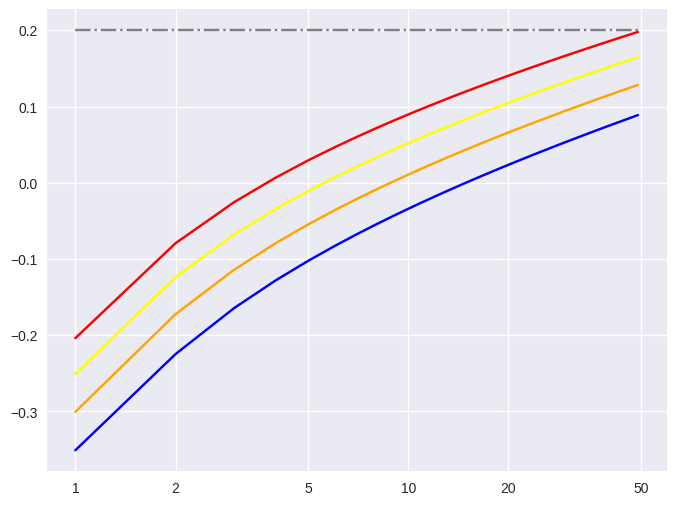

(0.8231712539930442, 60)

In [26]:
bgsPlot(weak[1],weak[2],weak[3],weak[4],0.2)

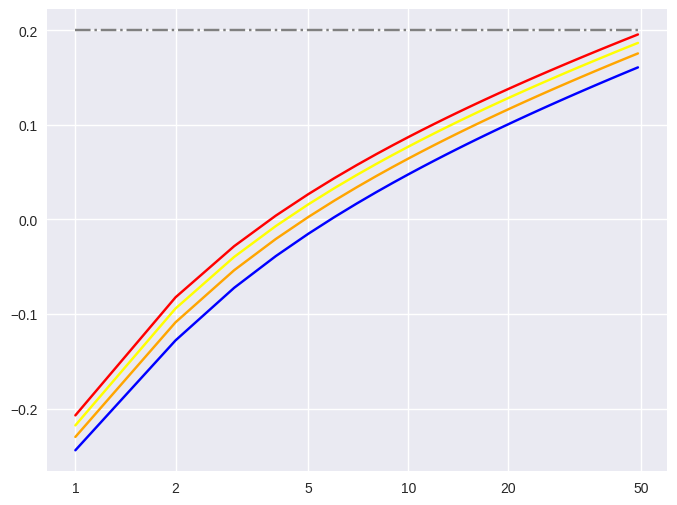

(0.8231712539930442, 60)

In [27]:
bgsPlot(strong[1],strong[2],strong[3],strong[4],0.2)